<a href="https://colab.research.google.com/github/suchith1012/AOML_Project/blob/main/AOML_Project_V1_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
O_data=pd.read_csv('/content/sample_data/resume_dataset.csv')

In [3]:
O_data

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."
...,...,...
164,Testing,Computer Skills: â¢ Proficient in MS office (...
165,Testing,â Willingness to accept the challenges. â ...
166,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne..."
167,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...


In [4]:
O_data.describe()

,Category,Resume
count,169,169
unique,25,166
top,Java Developer,"TECHNICALSKILLS SpringMVC, Hibernate, JDBC, Ja..."
freq,14,2


In [5]:
from random import randint

def candidateid(name):
  temp=name.split(" ")
  temp_rand=str(randint(100, 999))
  if(len(temp)>=2):
    return temp[0][0]+temp[1][0]+temp_rand
  else:
    return temp[0][0]+temp[0][1]+temp_rand


In [6]:
O_data["candidate_id"] = O_data["Category"].apply(lambda text: candidateid(text))
O_data.head()

,Category,Resume,candidate_id
0,Data Science,Skills * Programming Languages: Python (pandas...,DS905
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,DS536
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",DS595
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,DS702
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",DS668


In [7]:
O_data['processed_resume']=''

In [8]:
O_data.describe()

,Category,Resume,candidate_id,processed_resume
count,169,169,169,169
unique,25,166,167,1
top,Java Developer,"TECHNICALSKILLS SpringMVC, Hibernate, JDBC, Ja...",JD857,
freq,14,2,2,169


In [9]:
data_distribution = O_data['Category'].value_counts()

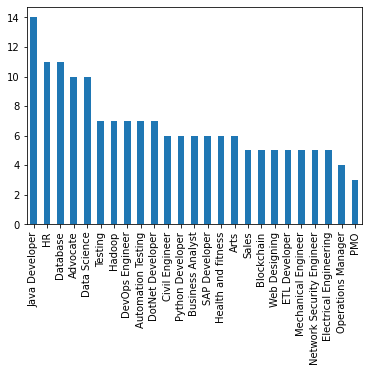

In [10]:
import matplotlib.pyplot as plt
data_distribution.plot.bar()
plt.show()

# Text Preprocessing

### Convert text to lowercase

In [11]:
O_data['processed_resume']=O_data['Resume'].str.lower()

In [12]:
O_data.head()

,Category,Resume,candidate_id,processed_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,DS905,skills * programming languages: python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,DS536,education details \r\nmay 2013 to may 2017 b.e...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",DS595,"areas of interest deep learning, control syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,DS702,skills â¢ r â¢ python â¢ sap hana â¢ table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",DS668,"education details \r\n mca ymcaust, faridab..."


### Removal of Punctuations

In [13]:
O_data["processed_resume"] = O_data['processed_resume'].str.replace('[^\w\s]','')

In [14]:
O_data

,Category,Resume,candidate_id,processed_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,DS905,skills programming languages python pandas nu...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,DS536,education details \r\nmay 2013 to may 2017 be ...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",DS595,areas of interest deep learning control system...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,DS702,skills â r â python â sap hana â tableau â sap...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",DS668,education details \r\n mca ymcaust faridaba...
...,...,...,...,...
164,Testing,Computer Skills: â¢ Proficient in MS office (...,Te591,computer skills â proficient in ms office word...
165,Testing,â Willingness to accept the challenges. â ...,Te587,â willingness to accept the challenges â posit...
166,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...",Te247,personal skills â quick learner â eagerness to...
167,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...,Te827,computer skills software knowledge mspower po...


### Remove url

In [15]:
O_data["processed_resume"] = O_data['processed_resume'].str.replace('http\S+\s*','')
O_data

,Category,Resume,candidate_id,processed_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,DS905,skills programming languages python pandas nu...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,DS536,education details \r\nmay 2013 to may 2017 be ...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",DS595,areas of interest deep learning control system...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,DS702,skills â r â python â sap hana â tableau â sap...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",DS668,education details \r\n mca ymcaust faridaba...
...,...,...,...,...
164,Testing,Computer Skills: â¢ Proficient in MS office (...,Te591,computer skills â proficient in ms office word...
165,Testing,â Willingness to accept the challenges. â ...,Te587,â willingness to accept the challenges â posit...
166,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...",Te247,personal skills â quick learner â eagerness to...
167,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...,Te827,computer skills software knowledge mspower po...


### Remove RT and CC

In [16]:
O_data["processed_resume"] = O_data['processed_resume'].str.replace('RT|cc','')
O_data

,Category,Resume,candidate_id,processed_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,DS905,skills programming languages python pandas nu...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,DS536,education details \r\nmay 2013 to may 2017 be ...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",DS595,areas of interest deep learning control system...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,DS702,skills â r â python â sap hana â tableau â sap...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",DS668,education details \r\n mca ymcaust faridaba...
...,...,...,...,...
164,Testing,Computer Skills: â¢ Proficient in MS office (...,Te591,computer skills â proficient in ms office word...
165,Testing,â Willingness to accept the challenges. â ...,Te587,â willingness to aept the challenges â positiv...
166,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...",Te247,personal skills â quick learner â eagerness to...
167,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...,Te827,computer skills software knowledge mspower po...


### Remove hashtags

In [17]:
O_data["processed_resume"] = O_data['processed_resume'].str.replace('#\S+','')
O_data

,Category,Resume,candidate_id,processed_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,DS905,skills programming languages python pandas nu...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,DS536,education details \r\nmay 2013 to may 2017 be ...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",DS595,areas of interest deep learning control system...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,DS702,skills â r â python â sap hana â tableau â sap...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",DS668,education details \r\n mca ymcaust faridaba...
...,...,...,...,...
164,Testing,Computer Skills: â¢ Proficient in MS office (...,Te591,computer skills â proficient in ms office word...
165,Testing,â Willingness to accept the challenges. â ...,Te587,â willingness to aept the challenges â positiv...
166,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...",Te247,personal skills â quick learner â eagerness to...
167,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...,Te827,computer skills software knowledge mspower po...


### Remove mentions

In [18]:
O_data["processed_resume"] = O_data['processed_resume'].str.replace('@\S+','')
O_data

,Category,Resume,candidate_id,processed_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,DS905,skills programming languages python pandas nu...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,DS536,education details \r\nmay 2013 to may 2017 be ...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",DS595,areas of interest deep learning control system...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,DS702,skills â r â python â sap hana â tableau â sap...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",DS668,education details \r\n mca ymcaust faridaba...
...,...,...,...,...
164,Testing,Computer Skills: â¢ Proficient in MS office (...,Te591,computer skills â proficient in ms office word...
165,Testing,â Willingness to accept the challenges. â ...,Te587,â willingness to aept the challenges â positiv...
166,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...",Te247,personal skills â quick learner â eagerness to...
167,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...,Te827,computer skills software knowledge mspower po...


### Removal of stopwords

In [19]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [20]:
from nltk.corpus import stopwords
stopwords_list = set(stopwords.words('english'))

In [21]:
stopwords_list

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [22]:
def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in stopwords_list])

In [23]:
O_data["processed_resume"] = O_data["processed_resume"].apply(lambda text: remove_stopwords(text))
O_data.head()

,Category,Resume,candidate_id,processed_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,DS905,skills programming languages python pandas num...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,DS536,education details may 2013 may 2017 uitrgpvdat...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",DS595,areas interest deep learning control system de...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,DS702,skills â r â python â sap hana â tableau â sap...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",DS668,education details mca ymcaust faridabad haryan...


### Removal of Frequent words

In [24]:
from collections import Counter
cnt = Counter()
for text in O_data["processed_resume"].values:
    for word in text.split():
        cnt[word] += 1
        
cnt.most_common(10)

[('â', 2523),
 ('exprience', 634),
 ('company', 601),
 ('description', 551),
 ('details', 540),
 ('months', 539),
 ('project', 526),
 ('data', 372),
 ('1', 311),
 ('management', 310)]

In [25]:
FREQWORDS = set([w for (w, wc) in cnt.most_common(10)])
def remove_freqwords(text):
    return " ".join([word for word in str(text).split() if word not in FREQWORDS])

O_data["processed_resume"] = O_data["processed_resume"].apply(lambda text: remove_freqwords(text))
O_data.head()

,Category,Resume,candidate_id,processed_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,DS905,skills programming languages python pandas num...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,DS536,education may 2013 may 2017 uitrgpvdata scient...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",DS595,areas interest deep learning control system de...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,DS702,skills r python sap hana tableau sap hana sql ...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",DS668,education mca ymcaust faridabad haryanadata sc...


### Remove rare words

In [26]:
n_rare_words = 10
RAREWORDS = set([w for (w, wc) in cnt.most_common()[:-n_rare_words-1:-1]])
print(RAREWORDS)
def remove_rarewords(text):
    return " ".join([word for word in str(text).split() if word not in RAREWORDS])

O_data["processed_resume"] = O_data["processed_resume"].apply(lambda text: remove_rarewords(text))
O_data.head()

{'tablet', 'wanless', 'bramha', '2vehicle', 'vankan', '1time', 'park', '2web', 'suncity', '3vistor'}


,Category,Resume,candidate_id,processed_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,DS905,skills programming languages python pandas num...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,DS536,education may 2013 may 2017 uitrgpvdata scient...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",DS595,areas interest deep learning control system de...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,DS702,skills r python sap hana tableau sap hana sql ...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",DS668,education mca ymcaust faridabad haryanadata sc...


### Stemming

In [27]:
from nltk.stem.porter import PorterStemmer

In [28]:
stemmer = PorterStemmer()
def stem_words(text):
    return " ".join([stemmer.stem(word) for word in text.split()])

O_data["processed_resume"] = O_data["processed_resume"].apply(lambda text: stem_words(text))
O_data.head()

,Category,Resume,candidate_id,processed_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,DS905,skill program languag python panda numpi scipi...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,DS536,educ may 2013 may 2017 uitrgpvdata scientistda...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",DS595,area interest deep learn control system design...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,DS702,skill r python sap hana tableau sap hana sql s...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",DS668,educ mca ymcaust faridabad haryanadata scienc ...


### Lemmatization

In [29]:
from nltk.stem import WordNetLemmatizer


In [30]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [31]:
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

O_data["processed_resume"] = O_data["processed_resume"].apply(lambda text: lemmatize_words(text))
O_data.head()

,Category,Resume,candidate_id,processed_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,DS905,skill program languag python panda numpi scipi...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,DS536,educ may 2013 may 2017 uitrgpvdata scientistda...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",DS595,area interest deep learn control system design...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,DS702,skill r python sap hana tableau sap hana sql s...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",DS668,educ mca ymcaust faridabad haryanadata scienc ...


###LabelEncoder -from scratch

In [32]:
O_data['Category'].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

In [33]:
O_data.loc[0]['Category']

'Data Science'

In [34]:
O_data.shape

(169, 4)

In [35]:
O_data['CategoryID'] = ''

In [36]:
category = {'Data Science':0, 'HR':1, 'Advocate':2, 'Arts':3, 'Web Designing':4,
       'Mechanical Engineer':5, 'Sales':6, 'Health and fitness':7,
       'Civil Engineer':8, 'Java Developer':9, 'Business Analyst':10,
       'SAP Developer':11, 'Automation Testing':12, 'Electrical Engineering':13,
       'Operations Manager':14, 'Python Developer':15, 'DevOps Engineer':16,
       'Network Security Engineer':17, 'PMO':18, 'Database':19, 'Hadoop':20,
       'ETL Developer':21, 'DotNet Developer':22, 'Blockchain':23, 'Testing':24}

for i in range(O_data.shape[0]):
  if O_data.loc[i]['Category'] in category.keys():
    O_data.loc[i]['CategoryID'] = category[O_data.loc[i]['Category']]

O_data.head()



,Category,Resume,candidate_id,processed_resume,CategoryID
0,Data Science,Skills * Programming Languages: Python (pandas...,DS905,skill program languag python panda numpi scipi...,0
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,DS536,educ may 2013 may 2017 uitrgpvdata scientistda...,0
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",DS595,area interest deep learn control system design...,0
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,DS702,skill r python sap hana tableau sap hana sql s...,0
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",DS668,educ mca ymcaust faridabad haryanadata scienc ...,0


# Feature Extraction

### Bag of Words Model

In [37]:
import numpy
import re

def tokenize(sentences):
    words = []
    for sentence in sentences:
        w = word_extraction(sentence)
        words.extend(w)
        
    words = sorted(list(set(words)))
    return words

def word_extraction(sentence):
    ignore = ['a', "the", "is"]
    words = re.sub("[^\w]", " ",  sentence).split()
    cleaned_text = [w.lower() for w in words if w not in ignore]
    return cleaned_text    
    
def generate_bow(allsentences):    
    vocab = tokenize(allsentences)
    print("Word List for Document \n{0} \n".format(vocab));
    bag_vec_list=[]
    for sentence in allsentences:
        words = word_extraction(sentence)
        bag_vector = numpy.zeros(len(vocab))
        for w in words:
            for i,word in enumerate(vocab):
                if word == w: 
                    bag_vector[i] += 1
               
        #print("{0} \n{1}\n".format(sentence,numpy.array(bag_vector)))
        bag_vec_list.append(bag_vector)
    return numpy.array(bag_vec_list)
        



In [38]:
proc_resume_list = list(O_data['processed_resume'])


In [39]:
bag_vector_numpy=generate_bow(proc_resume_list)

Word List for Document 
['000', '01', '017', '02', '03', '0307', '04', '04th', '05', '050educ', '06th', '07', '07112016', '07educ', '08', '09876971076', '10', '100', '101', '104', '108', '109', '10g', '10grac', '10magicalfing', '10x', '11', '110', '110v', '11171iec60076', '11201', '11204', '115', '118', '1180', '11g', '11goracl', '11gr2', '12', '120', '1200', '1216', '125', '12c', '12d', '12k', '13', '130', '132kv', '14', '147', '15', '150', '1500', '15000', '16', '163', '168', '16aug2012', '16th', '17', '175', '17th', '18', '1800', '182', '18aug2012', '18c', '19', '1900', '1972', '19793', '1992', '1993', '1995', '1996', '1997', '1998', '1999', '19xx', '1autocad', '1evalu', '1exterior', '1intern', '1jan', '1page', '1project', '1st', '1web', '1x', '1year', '2', '20', '2000', '20002003', '20002005', '200020052008', '2000a', '2001', '2002', '2003', '200320082008', '2003xpvista78', '2004', '2005', '20052008', '200520082016', '2006', '20062007', '2006educ', '2007', '200708', '20071995', '20

In [40]:
bag_vector_numpy.shape

(169, 6317)

In [41]:
target=O_data['CategoryID']
target_numpy = np.array(target,dtype='int')
target_numpy.shape

(169,)

#CountVectorizer - Inbuilt function

In [42]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
bag_vector_cv = vectorizer.fit_transform(proc_resume_list)

In [43]:
bag_vector_cv_numpy = bag_vector_cv.toarray()
bag_vector_cv_numpy.shape

(169, 6283)

### TF-IDF Vectorizer

In [44]:
from collections import Counter
from scipy.sparse import csr_matrix
import math
import operator
from sklearn.preprocessing import normalize
import numpy as np 

In [45]:
#IDF function
def IDF(corpus, unique_words):
   idf_dict={}
   N=len(corpus)
   for i in unique_words:
     count=0
     for sen in corpus:
       if i in sen.split():
         count=count+1
       idf_dict[i]=(math.log((1+N)/(count+1)))+1
   return idf_dict

In [46]:
def fit(whole_data):
    unique_words = set()
    if isinstance(whole_data, (list,)):
      for x in whole_data:
        for y in x.split():
          unique_words.add(y)
      unique_words = sorted(list(unique_words))
      vocab = {j:i for i,j in enumerate(unique_words)}
      Idf_values_of_all_unique_words=IDF(whole_data,unique_words)
    return vocab, Idf_values_of_all_unique_words
Vocabulary, idf_of_vocabulary=fit(proc_resume_list) 

In [47]:
print(list(Vocabulary.keys()))
print(list(idf_of_vocabulary.values()))

['000', '01', '017', '02', '03', '0307', '04', '04th', '05', '050educ', '06th', '07', '07112016', '07educ', '08', '09876971076', '10', '100', '101', '104', '108', '109', '10g', '10grac', '10magicalfing', '10x', '11', '110', '110v', '11171iec60076', '11201', '11204', '115', '118', '1180', '11g', '11goracl', '11gr2', '12', '120', '1200', '1216', '125', '12c', '12d', '12k', '13', '130', '132kv', '14', '147', '15', '150', '1500', '15000', '16', '163', '168', '16aug2012', '16th', '17', '175', '17th', '18', '1800', '182', '18aug2012', '18c', '19', '1900', '1972', '19793', '1992', '1993', '1995', '1996', '1997', '1998', '1999', '19xx', '1autocad', '1evalu', '1exterior', '1intern', '1jan', '1page', '1project', '1st', '1web', '1x', '1year', '2', '20', '2000', '20002003', '20002005', '200020052008', '2000a', '2001', '2002', '2003', '200320082008', '2003xpvista78', '2004', '2005', '20052008', '200520082016', '2006', '20062007', '2006educ', '2007', '200708', '20071995', '20072015', '2008', '200820

In [48]:
def transform(dataset,vocabulary,idf_values):
     sparse_matrix= csr_matrix( (len(dataset), len(vocabulary)), dtype=np.float64)
     for row  in range(0,len(dataset)):
       number_of_words_in_sentence=Counter(dataset[row].split())
       for word in dataset[row].split():
           if word in  list(vocabulary.keys()):
               tf_idf_value=(number_of_words_in_sentence[word]/len(dataset[row].split()))*(idf_values[word])
               sparse_matrix[row,vocabulary[word]]=tf_idf_value
     print("NORM FORM\n",normalize(sparse_matrix, norm='l2', axis=1, copy=True, return_norm=False))
     output =normalize(sparse_matrix, norm='l2', axis=1, copy=True, return_norm=False)
     return output
final_output=transform(proc_resume_list,Vocabulary,idf_of_vocabulary)
print(final_output.shape) 

/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


NORM FORM
   (0, 167)	0.07426564672790036
  (0, 240)	0.02279446117160016
  (0, 284)	0.015003423886500441
  (0, 382)	0.07426564672790036
  (0, 384)	0.02786911232805678
  (0, 403)	0.03202235104596588
  (0, 428)	0.026851480503835873
  (0, 440)	0.04095455585516971
  (0, 528)	0.02223351854893603
  (0, 564)	0.15598280113213672
  (0, 569)	0.18235568937280128
  (0, 572)	0.020311573016334215
  (0, 581)	0.02903258560880623
  (0, 591)	0.044251166885252775
  (0, 596)	0.032979979327011265
  (0, 611)	0.024047774517807444
  (0, 694)	0.03861557310613201
  (0, 710)	0.1202388725890372
  (0, 711)	0.02843005495072091
  (0, 712)	0.044251166885252775
  (0, 717)	0.09117242806526261
  (0, 759)	0.041502326975448756
  (0, 838)	0.01659792476981528
  (0, 848)	0.08190911171033942
  (0, 881)	0.02638675726684513
  :	:
  (168, 4684)	0.024938070109128525
  (168, 4704)	0.0245831822682661
  (168, 4775)	0.1144628568646319
  (168, 4867)	0.0762913896093047
  (168, 4903)	0.053731381803720175
  (168, 4991)	0.0339531245037294

In [49]:
final_output.shape

(169, 6318)

In [50]:
type(final_output[0][0])

scipy.sparse.csr.csr_matrix

In [51]:
tf_idf_vector = csr_matrix.toarray(final_output)

In [52]:
type(tf_idf_vector),tf_idf_vector.shape

(numpy.ndarray, (169, 6318))

# TF-IDF Vectorizer - Inbuilt Function

In [53]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
tf_idf_vector_fn = vectorizer.fit_transform(proc_resume_list)

In [54]:
tf_idf_vector_fn_numpy = tf_idf_vector_fn.toarray()
tf_idf_vector_fn_numpy.shape

(169, 6283)

# Classifiers

### With BOW model - Features from scratch

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(bag_vector_numpy, target_numpy, test_size=0.33, random_state=42)

In [56]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((113, 6317), (56, 6317), (113,), (56,))

In [57]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics



In [58]:
%%time
clf_1 = MultinomialNB(alpha=.01)
clf_1.fit(X_train,y_train)
pred = clf_1.predict(X_test)
acc_score = metrics.accuracy_score(y_test, pred)
f1_score = metrics.f1_score(y_test, pred, average='macro')

print('Total accuracy classification score: {}'.format(acc_score))
print('Total F1 classification score: {}'.format(f1_score))

Total accuracy classification score: 0.6785714285714286
Total F1 classification score: 0.6215353535353535
CPU times: user 28.1 ms, sys: 11.1 ms, total: 39.2 ms
Wall time: 25.7 ms


In [59]:
from sklearn.linear_model import SGDClassifier


In [60]:
%%time
sgd=SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)
sgd.fit(X_train, y_train)
y_pred = sgd.predict(X_test)

accuracy_score = metrics.accuracy_score(y_test, y_pred)
f1_score_value = metrics.f1_score(y_test, y_pred, average='macro')

print('Total accuracy classification score: {}'.format(accuracy_score))
print('Total F1 classification score: {}'.format(f1_score_value))

Total accuracy classification score: 0.5535714285714286
Total F1 classification score: 0.4408074768368886
CPU times: user 185 ms, sys: 67.7 ms, total: 253 ms
Wall time: 181 ms


In [61]:
from sklearn.svm import LinearSVC


In [62]:
%%time
svc = LinearSVC(random_state=42,max_iter=2000)
svc.fit(X_train,y_train)
y_pred_svc = svc.predict(X_test)

acc = metrics.accuracy_score(y_test, y_pred_svc)
f1 = metrics.f1_score(y_test, y_pred_svc, average='macro')

print('Total accuracy classification score: {}'.format(acc))
print('Total F1 classification score: {}'.format(f1))

Total accuracy classification score: 0.6785714285714286
Total F1 classification score: 0.6328169515669515
CPU times: user 118 ms, sys: 67.7 ms, total: 186 ms
Wall time: 119 ms


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


#With BoW Model - Inbuilt features

In [63]:
X_train, X_test, y_train, y_test = train_test_split(bag_vector_cv_numpy, target_numpy, test_size=0.33, random_state=42)

In [64]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((113, 6283), (56, 6283), (113,), (56,))

In [65]:
%%time
clf_3 = MultinomialNB(alpha=.01)
clf_3.fit(X_train,y_train)
pred = clf_3.predict(X_test)
acc_score = metrics.accuracy_score(y_test, pred)
f1_score = metrics.f1_score(y_test, pred, average='macro')

print('Total accuracy classification score: {}'.format(acc_score))
print('Total F1 classification score: {}'.format(f1_score))

Total accuracy classification score: 0.6785714285714286
Total F1 classification score: 0.6188888888888889
CPU times: user 84.9 ms, sys: 30.3 ms, total: 115 ms
Wall time: 82.9 ms


In [66]:
%%time
sgd3=SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, max_iter=5, tol=None)
sgd3.fit(X_train, y_train)
y_pred = sgd3.predict(X_test)

accuracy_score = metrics.accuracy_score(y_test, y_pred)
f1_score_value = metrics.f1_score(y_test, y_pred, average='macro')

print('Total accuracy classification score: {}'.format(accuracy_score))
print('Total F1 classification score: {}'.format(f1_score_value))

Total accuracy classification score: 0.5
Total F1 classification score: 0.4773429299745089
CPU times: user 179 ms, sys: 94.9 ms, total: 274 ms
Wall time: 177 ms


In [67]:
%%time
svc3 = LinearSVC(max_iter=2000)
svc3.fit(X_train,y_train)
y_pred_svc = svc3.predict(X_test)

acc = metrics.accuracy_score(y_test, y_pred_svc)
f1 = metrics.f1_score(y_test, y_pred_svc, average='macro')

print('Total accuracy classification score: {}'.format(acc))
print('Total F1 classification score: {}'.format(f1))

Total accuracy classification score: 0.6964285714285714
Total F1 classification score: 0.6057336182336183
CPU times: user 132 ms, sys: 83.8 ms, total: 216 ms
Wall time: 121 ms


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


### With TF-IDF Vectorizer

In [68]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(tf_idf_vector, target_numpy, test_size=0.33,random_state=42)

In [69]:
X_train_1.shape,X_test_1.shape,y_train_1.shape,y_test_1.shape

((113, 6318), (56, 6318), (113,), (56,))

In [70]:
%%time

clf_2 = MultinomialNB(alpha=.01)
clf_2.fit(X_train_1,y_train_1)
# Predict and score the vectors
pred_1 = clf_2.predict(X_test_1)
acc_score = metrics.accuracy_score(y_test_1, pred_1)
f1_score = metrics.f1_score(y_test_1, pred_1, average='macro')

print('Total accuracy classification score: {}'.format(acc_score))
print('Total F1 classification score: {}'.format(f1_score))

Total accuracy classification score: 0.7142857142857143
Total F1 classification score: 0.6835555555555556
CPU times: user 20.7 ms, sys: 26.2 ms, total: 46.8 ms
Wall time: 27.9 ms


In [71]:
%%time

sgd_2=SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)
sgd_2.fit(X_train_1, y_train_1)
y_pred_1 = sgd_2.predict(X_test_1)

accuracy_score = metrics.accuracy_score(y_test_1, y_pred_1)
f1_score_value = metrics.f1_score(y_test_1, y_pred_1, average='macro')

print('Total accuracy classification score: {}'.format(accuracy_score))
print('Total F1 classification score: {}'.format(f1_score_value))

Total accuracy classification score: 0.7857142857142857
Total F1 classification score: 0.7731672262922263
CPU times: user 188 ms, sys: 78.6 ms, total: 267 ms
Wall time: 182 ms


In [72]:
%%time

svc_2 = LinearSVC(random_state=42,max_iter=2000)
svc_2.fit(X_train_1,y_train_1)
y_pred_svc_2 = svc_2.predict(X_test_1)

acc = metrics.accuracy_score(y_test_1, y_pred_svc_2)
f1 = metrics.f1_score(y_test_1, y_pred_svc_2, average='macro')

print('Total accuracy classification score: {}'.format(acc))
print('Total F1 classification score: {}'.format(f1))

Total accuracy classification score: 0.8214285714285714
Total F1 classification score: 0.7738571613571613
CPU times: user 54.5 ms, sys: 45.4 ms, total: 99.9 ms
Wall time: 54.5 ms


# With TF-IDF vectorizer - Inbuilt function

In [73]:
X_train_2, X_test_2, y_train_2, y_test_2= train_test_split(tf_idf_vector_fn_numpy, target_numpy, test_size=0.33,random_state=42)

In [74]:
%%time

clf_4 = MultinomialNB(alpha=.01)
clf_4.fit(X_train_2,y_train_2)
pred_1 = clf_4.predict(X_test_2)
acc_score = metrics.accuracy_score(y_test_2, pred_1)
f1_score = metrics.f1_score(y_test_2, pred_1, average='macro')

print('Total accuracy classification score: {}'.format(acc_score))
print('Total F1 classification score: {}'.format(f1_score))

Total accuracy classification score: 0.7678571428571429
Total F1 classification score: 0.7213333333333334
CPU times: user 20.2 ms, sys: 17.1 ms, total: 37.3 ms
Wall time: 18.7 ms


In [75]:
%%time

sgd_4=SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)
sgd_4.fit(X_train_2, y_train_2)
y_pred_1 = sgd_4.predict(X_test_2)

accuracy_score = metrics.accuracy_score(y_test_2, y_pred_1)
f1_score_value = metrics.f1_score(y_test_2, y_pred_1, average='macro')

print('Total accuracy classification score: {}'.format(accuracy_score))
print('Total F1 classification score: {}'.format(f1_score_value))

Total accuracy classification score: 0.7857142857142857
Total F1 classification score: 0.7463319088319088
CPU times: user 185 ms, sys: 86.9 ms, total: 272 ms
Wall time: 176 ms


In [76]:
%%time

svc_4 = LinearSVC(random_state=42,max_iter=2000)
svc_4.fit(X_train_2,y_train_2)
y_pred_svc_2 = svc_4.predict(X_test_2)

acc = metrics.accuracy_score(y_test_2, y_pred_svc_2)
f1 = metrics.f1_score(y_test_2, y_pred_svc_2, average='macro')

print('Total accuracy classification score: {}'.format(acc))
print('Total F1 classification score: {}'.format(f1))

Total accuracy classification score: 0.8571428571428571
Total F1 classification score: 0.8335793835793835
CPU times: user 51.6 ms, sys: 34.3 ms, total: 85.9 ms
Wall time: 59.7 ms


# Resume Recommendation system

##Considering Job description

In [77]:
job_desc = "Advanced analytical knowledge of data, conducting big data analysis, Data conditioning, Programming advanced computing, developing algorithms, developing software and data models, executing predictive analytics. Master’s degree in Operations Research, Industrial Engineering, Applied Mathematics, Statistics, Physics, Computer Science, or related fields. 5-7 years of professional experience. Proficient with one or more programming languages (Java, C++, Python, R, etc.). Demonstrated experience applying data science methods to real-world data problems. Experience utilizing visualization tools to take advantage of the growing volume of available information"
#text to lowercase
job_desc = job_desc.lower()
# removing stopwords
cleaned_job_desc = remove_stopwords(job_desc)
# stemming
cleaned_job_desc = stem_words(cleaned_job_desc)
#lemmetizing
cleaned_job_desc = lemmatize_words(cleaned_job_desc)


In [78]:
def transform_jobdesc(data,vocabulary,idf_values):
     sparse_matrix= csr_matrix( (1, len(vocabulary)), dtype=np.float64)
     number_of_words_in_sentence=Counter(data.split())
     for word in data.split():
        if word in  list(vocabulary.keys()):
            tf_idf_value=(number_of_words_in_sentence[word]/len(data.split()))*(idf_values[word])
            sparse_matrix[0,vocabulary[word]]=tf_idf_value
     print("NORM FORM\n",normalize(sparse_matrix, norm='l2', axis=1, copy=True, return_norm=False))
     output =normalize(sparse_matrix, norm='l2', axis=1, copy=True, return_norm=False)
     return output

In [79]:
cleaned_job_desc_vector=transform_jobdesc(cleaned_job_desc,Vocabulary,idf_of_vocabulary)

NORM FORM
   (0, 428)	0.3163716586759364
  (0, 429)	0.24126901986624846
  (0, 569)	0.1342853606983266
  (0, 632)	0.3163716586759364
  (0, 770)	0.14370730749407687
  (0, 904)	0.1886481513313218
  (0, 1365)	0.09321557075433648
  (0, 1379)	0.13602728279639514
  (0, 1677)	0.2006855039332413
  (0, 1694)	0.26068981678371783
  (0, 1730)	0.14286961978087037
  (0, 2152)	0.1209356635744898
  (0, 2169)	0.21496223893061495
  (0, 2544)	0.22748974516626047
  (0, 2837)	0.1397135303194817
  (0, 2850)	0.11155997229047508
  (0, 3140)	0.11155997229047508
  (0, 3190)	0.10947714071994744
  (0, 3569)	0.18360163774287108
  (0, 3933)	0.15040156612541372
  (0, 3958)	0.08838726974686226
  (0, 4307)	0.1942896735488031
  (0, 4375)	0.15544807971386446
  (0, 4376)	0.15544807971386446
  (0, 4380)	0.209269763015785
  (0, 4648)	0.11050723587661954
  (0, 4934)	0.1126363676718058
  (0, 5202)	0.09321557075433648
  (0, 5499)	0.12941021608938794
  (0, 5707)	0.09321557075433648
  (0, 5950)	0.1528583907290806
  (0, 6065)	0.1

/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


In [80]:
cleaned_job_desc_vector=csr_matrix.toarray(cleaned_job_desc_vector)

In [81]:
cleaned_job_desc_vector.shape

(1, 6318)

In [82]:
cleaned_job_desc_vector[0][5499]

0.12941021608938794

In [83]:
tf_idf_vector.shape

(169, 6318)

##Cosine Similarity

In [84]:
def cosine_similarity_Jobdesc_resume(job_desc_vector,tf_idf_vector):
  cosine_similarity_dict={}
  count=0
  for row in tf_idf_vector:
    sim_score = np.dot(job_desc_vector,row)
    #print(sim_score)
    cosine_similarity_dict[count]=sim_score
    count+=1
  cosine_sim_score_sorted= dict(sorted(cosine_similarity_dict.items(),
                            key=operator.itemgetter(1),
                            reverse=True))
  cosine_sim_score_items = cosine_sim_score_sorted.items()
  return list(cosine_sim_score_items)[:5]
  



In [85]:
cosine_similarity_Jobdesc_resume(cleaned_job_desc_vector,tf_idf_vector)

[(3, array([0.15156932])),
 (0, array([0.13365248])),
 (20, array([0.12090708])),
 (103, array([0.11163754])),
 (6, array([0.10984415]))]

Need to candidate IDs, so that distinction will be clear

## KNN 

In [86]:
import math
def euclidean_distance(d1,d2):
  temp=np.sum(np.square(d1 - d2))
  temp_2=np.sqrt(temp)
  return temp_2


In [87]:
def knn(tf_idf_vector,cleaned_job_desc_vector,k):
  neighbor_distances=[]
  for i in range(tf_idf_vector.shape[0]):
    neighbor_distances.append(euclidean_distance(tf_idf_vector[i],cleaned_job_desc_vector))
  sorted_neighbor_distances = sorted(neighbor_distances)
  k_nearest_distances = sorted_neighbor_distances[:k]
  s = numpy.array(neighbor_distances)
  sort_index = numpy.argsort(s)
  return k_nearest_distances,sort_index[:k]

In [88]:
knn_list,sort_list=knn(tf_idf_vector,cleaned_job_desc_vector,5)

In [89]:
knn_list

[1.3026363094177922,
 1.3163187433872736,
 1.3259659989186292,
 1.332938451215057,
 1.334283216809398]

In [90]:
sort_list

array([  3,   0,  20, 103,   6])

In [91]:
for i in sort_list:
  print(O_data._get_value(i, 'candidate_id'))

DS702
DS905
HR640
OM950
DS416


### BlockChain

In [92]:
job_desc_block = "Excellent programming skills, knowledge of blockchain protocols, strong analytical abilities, and effective communication skills"
#text to lowercase
job_desc = job_desc_block.lower()
# removing stopwords
cleaned_job_desc_block = remove_stopwords(job_desc_block)
# stemming
cleaned_job_desc_block = stem_words(cleaned_job_desc_block)
#lemmetizing
cleaned_job_desc_block = lemmatize_words(cleaned_job_desc_block)

In [93]:
cleaned_job_desc_block_vector=transform_jobdesc(cleaned_job_desc_block,Vocabulary,idf_of_vocabulary)

NORM FORM
   (0, 569)	0.33204890321746794
  (0, 937)	0.536087995254321
  (0, 1335)	0.25873183392669236
  (0, 1958)	0.32387760312744357
  (0, 2144)	0.3090536716219803
  (0, 3140)	0.2758555828378169
  (0, 4380)	0.25873183392669236
  (0, 5141)	0.18247315707599826
  (0, 5376)	0.3983280482911822


/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


In [94]:
cleaned_job_desc_block_vector=csr_matrix.toarray(cleaned_job_desc_block_vector)

In [95]:
cleaned_job_desc_block_vector.shape

(1, 6318)

In [96]:
cosine_similarity_Jobdesc_resume(cleaned_job_desc_block_vector,tf_idf_vector)

[(160, array([0.22016347])),
 (158, array([0.19781177])),
 (157, array([0.1528357])),
 (94, array([0.12860427])),
 (137, array([0.12592264]))]

In [97]:
knn_list,sort_list=knn(tf_idf_vector,cleaned_job_desc_block_vector,5)
print(sort_list)

[160 158 157  94 137]


In [98]:
for i in sort_list:
  print(O_data._get_value(i, 'candidate_id'))

Bl850
Bl512
Bl699
AT436
Da847


### Project Management Office

In [99]:
job_desc = "A Bachelor's degree in Business, Administration, or a related field.A Project Management Professional (PMP) Certification may be advantageous.A minimum of five years' experience in the industry.A minimum of one year's experience in a supervisory position may be advantageous.Strong leadership skills.Good written and verbal communication skills.Strong attention to details and technicalities.Excellent organizational and technical skills.Good interpersonal and multi-tasking skills"
#text to lowercase
job_desc = job_desc.lower()
# removing stopwords
cleaned_job_desc = remove_stopwords(job_desc)
# stemming
cleaned_job_desc = stem_words(cleaned_job_desc)
#lemmetizing
cleaned_job_desc = lemmatize_words(cleaned_job_desc)

In [100]:
cleaned_job_desc_vector=transform_jobdesc(cleaned_job_desc,Vocabulary,idf_of_vocabulary)

NORM FORM
   (0, 1153)	0.15706399866428886
  (0, 1335)	0.1143600362150757
  (0, 1677)	0.21933796040964662
  (0, 1723)	0.17288820813007091
  (0, 2169)	0.23494162820956221
  (0, 2298)	0.2274076494765242
  (0, 2927)	0.1956768295242822
  (0, 3225)	0.1869316555030307
  (0, 3427)	0.1003165888421159
  (0, 3519)	0.2863092172368761
  (0, 3611)	0.5698385941410692
  (0, 3933)	0.16438044656847098
  (0, 3988)	0.23695206585642598
  (0, 4265)	0.16182631281563617
  (0, 4375)	0.1698960018825138
  (0, 4387)	0.11965235299197782
  (0, 4648)	0.12077818902031137
  (0, 5141)	0.08065353433626136
  (0, 5548)	0.09732438259455879
  (0, 6005)	0.23695206585642598
  (0, 6221)	0.21933796040964662


/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


In [101]:
cleaned_job_desc_vector=csr_matrix.toarray(cleaned_job_desc_vector)

In [102]:
cosine_similarity_Jobdesc_resume(cleaned_job_desc_vector,tf_idf_vector)

[(56, array([0.10615323])),
 (89, array([0.0870378])),
 (15, array([0.07903487])),
 (103, array([0.07244539])),
 (124, array([0.07125405]))]

In [103]:
knn_list,sort_list=knn(tf_idf_vector,cleaned_job_desc_vector,5)
print(sort_list)
for i in sort_list:
  print(O_data._get_value(i, 'candidate_id'))

[ 56  89  15 103 124]
Ha382
SD893
HR590
OM950
PM890


### Network Security Engineer

In [104]:
job_desc = "Maintaining LAN, WLAN and architecture of the server as per the business policyAs a precautionary measure, analyze and implement new security protocols for greater efficiency against any threat or malfunctionsImplement a virus detection system beforehand for sound safety.Resolving the existing security issue including hardware malfunctionsTracking the vulnerable scripts  to avert the potential threatsGenerating and maintaining the virtual private network, firewalls,web protocols and email security decorum.Reporting the security analysis of findingsMaintaining the regulatory systems about ISMS policy (Information System Management Systems)Investigations of Security breach alertDeveloping the security authentication protocolMaintaining server and switchesMaintaining & implementation of the SOP for Network securityStatus reports of hardware and software products as per designated policies.Supervising the installation of new software’s and hardware’sRecommend modifications in legal, technical and regulatory areas that affect IT security.Knowledge of performing routing protocols (MPLS, HAIPE/IP, QOS and WAN)Monitoring of web security gateways, perimeter security, network access controls, endpoint security"
#text to lowercase
job_desc = job_desc.lower()
# removing stopwords
cleaned_job_desc = remove_stopwords(job_desc)
# stemming
cleaned_job_desc = stem_words(cleaned_job_desc)
#lemmetizing
cleaned_job_desc = lemmatize_words(cleaned_job_desc)

In [105]:
cleaned_job_desc_vector=transform_jobdesc(cleaned_job_desc,Vocabulary,idf_of_vocabulary)

/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


NORM FORM
   (0, 455)	0.14213271064780936
  (0, 564)	0.06766725299668408
  (0, 572)	0.07049127673467527
  (0, 655)	0.09671970299331129
  (0, 658)	0.08119921704237137
  (0, 752)	0.12257439281940949
  (0, 1047)	0.05667784713177681
  (0, 1711)	0.05325344567738586
  (0, 1725)	0.11113351031260953
  (0, 1959)	0.08860226767171138
  (0, 1990)	0.10816058550011126
  (0, 2014)	0.14213271064780936
  (0, 2158)	0.08860226767171138
  (0, 2595)	0.21632117100022252
  (0, 2798)	0.11810078845575062
  (0, 2813)	0.06766725299668408
  (0, 2886)	0.07910813550348406
  (0, 2982)	0.06274757784561319
  (0, 3412)	0.12779887866841966
  (0, 3427)	0.0540713779652609
  (0, 3646)	0.11113351031260953
  (0, 3811)	0.1489440950897705
  (0, 3817)	0.12220684447373888
  (0, 4138)	0.13400660057900252
  (0, 4141)	0.060058240225587034
  (0, 4252)	0.09004959456307517
  (0, 4278)	0.1054712478800851
  (0, 4352)	0.1030160749910096
  (0, 4370)	0.061640899213971485
  (0, 4418)	0.36772317845822844
  (0, 4643)	0.30714718630921867
  (0,

In [106]:
cleaned_job_desc_vector=csr_matrix.toarray(cleaned_job_desc_vector)

In [107]:
cosine_similarity_Jobdesc_resume(cleaned_job_desc_vector,tf_idf_vector)

[(120, array([0.25622026])),
 (123, array([0.19362962])),
 (119, array([0.18779425])),
 (121, array([0.1643392])),
 (134, array([0.13707371]))]

In [108]:
knn_list,sort_list=knn(tf_idf_vector,cleaned_job_desc_vector,5)
print(sort_list)
for i in sort_list:
  print(O_data._get_value(i, 'candidate_id'))

[120 123 119 121 134]
NS236
NS704
NS464
NS508
Da928
